In [1]:
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('data/FINAL_FROM_DF.csv')

In [3]:
data.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [4]:
data.SYMBOL.unique

<bound method Series.unique of 0          20MICRONS
1         3IINFOTECH
2            3MINDIA
3            63MOONS
4            8KMILES
5           A2ZINFRA
6         AARTIDRUGS
7           AARTIIND
8          AARVEEDEN
9               ABAN
10               ABB
11        ABBOTINDIA
12             ABFRL
13           ABGSHIP
14        ABIRLANUVO
15         ABMINTLTD
16               ACC
17           ACCELYA
18               ACE
19          ADANIENT
20        ADANIPORTS
21        ADANIPOWER
22        ADANITRANS
23          ADFFOODS
24           ADHUNIK
25        ADHUNIKIND
26            ADLABS
27          ADORWELD
28              ADSL
29        ADVANIHOTR
             ...    
846374    WINDMACHIN
846375       WINSOME
846376          WIPL
846377         WIPRO
846378    WOCKPHARMA
846379      WONDERLA
846380         WORTH
846381           WSI
846382    WSTCSTPAPR
846383     XCHANGING
846384      XLENERGY
846385     XPROINDIA
846386       YESBANK
846387    ZANDUREALT
846388          ZEEL
846

In [5]:
data.SYMBOL.value_counts()

SRTRANSFIN    4709
IDFCBANK      4379
IRFC          4362
NHAI          3360
RECLTD        2919
L&TINFRA      2760
DHFL          2707
NTPC          2678
ECLFINANCE    2367
IIFLFIN       2294
HUDCO         2165
SREINFRA      2099
IFCI          2093
SBIN          1589
MUTHOOTFIN    1459
SHRIRAMCIT    1447
IBULHSGFIN    1309
IIHFL         1228
BLUEDART      1226
SREIBNPNCD    1161
NHPC          1055
JSWSTEEL       998
ZEEL           982
PFC            966
EHFLNCD        927
HDFC           897
RHFL           867
RELIFIN        799
MUKANDLTD      765
UPL            728
              ... 
SDAFXIXGR        2
WB3RD            2
BSLRGES1RG       2
UTRGRXIX20       1
BSLFTPLVDG       1
KAWIRES          1
VF1RG            1
H1309S37RQ       1
SMCSRIIIRD       1
IPRU2288         1
IPRU2660         1
UTIFEFRDP1       1
DWSFMP64RG       1
VF1RD            1
CLASSIC          1
ICICI0202        1
IDR1AGD          1
UTCPOSRGR1       1
ASTRON           1
M17RD            1
SGBDEC2512       1
IPRU2691    

In [6]:
data.columns

Index(['SYMBOL', 'SERIES', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'LAST', 'PREVCLOSE',
       'TOTTRDQTY', 'TOTTRDVAL', 'TIMESTAMP', 'TOTALTRADES', 'ISIN'],
      dtype='object')

In [7]:
data['TIMESTAMP'].dtype

dtype('O')

In [8]:
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])

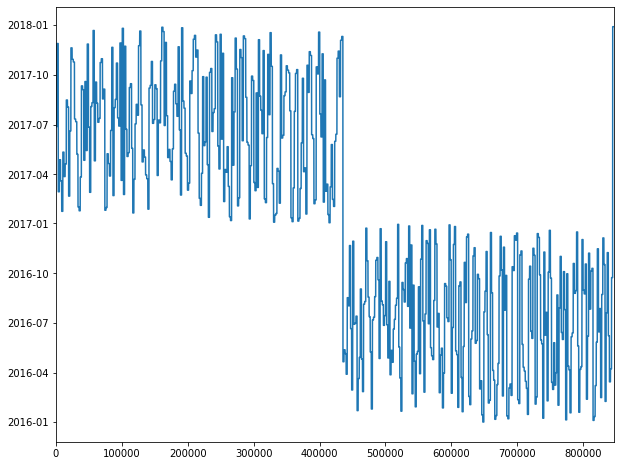

In [9]:
data['TIMESTAMP'].plot(figsize=(10,8))

In [10]:
data.CLOSE.describe()

count    846404.000000
mean        560.815168
std        2004.576315
min           0.050000
25%          39.750000
50%         138.900000
75%         489.550000
max      119990.000000
Name: CLOSE, dtype: float64

In [11]:
data.columns

Index(['SYMBOL', 'SERIES', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'LAST', 'PREVCLOSE',
       'TOTTRDQTY', 'TOTTRDVAL', 'TIMESTAMP', 'TOTALTRADES', 'ISIN'],
      dtype='object')

In [12]:
data.set_index('TIMESTAMP', inplace=True)

In [13]:
data.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,ISIN
TIMESTAMP,,,,,,,,,,,,
2017-06-28,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,202,INE144J01027
2017-06-28,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,7353,INE748C01020
2017-06-28,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,748,INE470A01017
2017-06-28,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,437,INE111B01023
2017-06-28,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,1866,INE650K01021


In [14]:
data.drop('ISIN', 1, inplace=True)

In [16]:
data.SERIES.value_counts()

EQ    739199
BE     37428
SM     11229
N6      5080
N2      4828
N4      3722
N5      3661
N1      3576
N3      3098
N8      2884
BZ      2825
GB      2343
N9      2021
N7      1658
NE      1602
NB      1467
NC      1195
ND      1046
P2       923
NJ       851
NL       826
NF       716
NO       544
NH       506
DR       495
NI       477
NW       476
MF       473
NK       471
NZ       452
       ...  
Q1       298
NS       266
Y8       257
Y3       239
YB       230
Y7       227
BL       227
Y2       212
IL       205
NM       198
YA       197
NV       183
Y6       151
YG       130
NY       120
NT       120
YC       107
NR        86
Y4        77
Y5        77
YD        60
D1        48
Q2        30
HC        20
NQ        19
H6         7
HB         7
HE         1
HA         1
BT         1
Name: SERIES, Length: 71, dtype: int64

In [18]:
print('\nnumber of different stocks: ', len(list(set(data.SYMBOL))))
print(list(set(data.SYMBOL))[:100])


number of different stocks:  2037
['ALLSEC', 'MADHAV', 'IPRU2599', 'HINDDORROL', 'SELMCL', 'UFLEX', 'WALCHANNAG', 'AKSHOPTFBR', 'KHAITANELE', 'UCALFUEL', 'KIRIINDUS', 'UNITEDPOLY', 'BSLRGES1RG', 'RCF', 'LUPIN', 'HEG', 'MANDHANA', 'GTNIND', 'APLLTD', 'JPINFRATEC', 'MELSTAR', 'BHAGERIA', 'POLYPLEX', 'ARVIND', 'UNIENTER', 'PENINLAND', 'SURYALAXMI', 'PLASTIBLEN', 'CYBERMEDIA', 'JETFREIGHT', 'FINANTECH', 'MAHESHWARI', 'ESTER', 'BANG', 'TULSI', 'ARROWCOAT', 'TNTELE', 'RBLBANK', 'H1190M36RQ', 'ABIRLANUVO', 'BALPHARMA', 'GAEL', 'FCEL', 'RANEENGINE', 'FEDDERELEC', 'GRASIM', 'NEYVELILIG', 'HUSYSLTD', 'WILLAMAGOR', 'CUPID', 'USHERAGRO', 'EIHAHOTELS', 'KSCL', 'OCL', 'IVC', 'SGBDEC25XI', 'PIONEEREMB', 'CINEVISTA', 'LTTS', 'HDFCSENETF', 'SEPOWER', 'MIRCELECTR', 'BIOCON', 'BLUECOAST', 'BHARATWIRE', 'PATSPINLTD', 'SUMEETINDS', 'GARDENSILK', 'CAPLIPOINT', 'BEDMUTHA', 'PFC', 'RELIABLE', 'AGCNET', 'DHANUKA', 'MYSOREBANK', 'RAJTV', 'SURANAT&P', 'INDOSOLAR', 'POWERMECH', 'THEMISMED', 'AKASH', 'ELECTCAST',

In [19]:
data.isnull().sum()

SYMBOL            0
SERIES         2457
OPEN              0
HIGH              0
LOW               0
CLOSE             0
LAST              0
PREVCLOSE         0
TOTTRDQTY         0
TOTTRDVAL         0
TOTALTRADES       0
dtype: int64

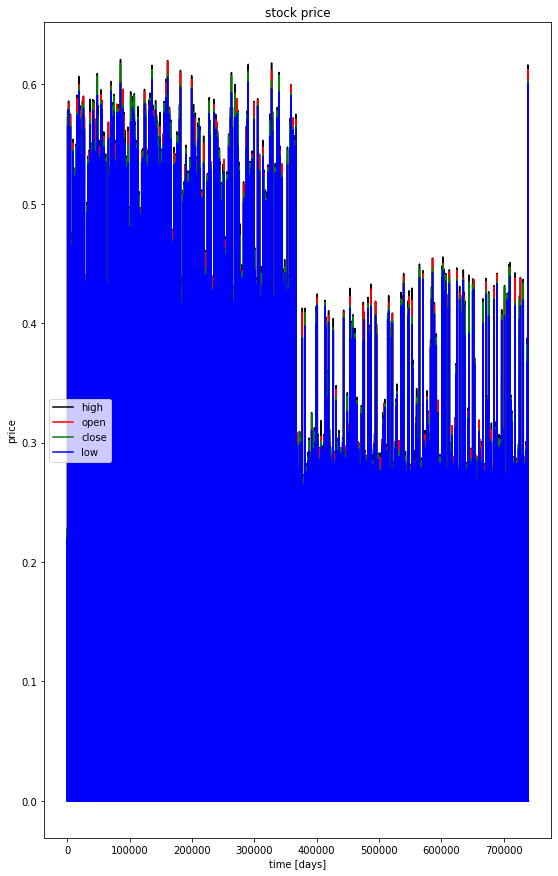

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15));
plt.subplot(1,2,1);
plt.plot(data[data.SERIES == 'EQ'].HIGH.values, color='black', label='high')
plt.plot(data[data.SERIES == 'EQ'].OPEN.values, color='red', label='open')
plt.plot(data[data.SERIES == 'EQ'].CLOSE.values, color='green', label='close')
plt.plot(data[data.SERIES == 'EQ'].LOW.values, color='blue', label='low')

plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

In [45]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
def normalize_data(df):
    min_max_scaler =MinMaxScaler()
    df['OPEN'] = min_max_scaler.fit_transform(df.OPEN.values.reshape(-1,1))
    df['HIGH'] = min_max_scaler.fit_transform(df.HIGH.values.reshape(-1,1))
    df['LOW'] = min_max_scaler.fit_transform(df.LOW.values.reshape(-1,1))
    df['CLOSE'] = min_max_scaler.fit_transform(df['CLOSE'].values.reshape(-1,1))
    return df

In [47]:
data = normalize_data(data)

In [53]:
import numpy as np
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [54]:
data_eq = data[data.SERIES=='EQ'].copy()

In [60]:
len(data_eq)

739199

In [59]:
int(len(data_eq)*0.2) + int(len(data_eq)*0.8)

739198

In [63]:
def splits(data, len_):
    testing = int(len(data)*len_)
    training = int(len(data)*(1-len_))
    return training, testing

In [64]:
splits(data_eq, 0.2)

(591359, 147839)